In [1]:
import pandas as pd
df=pd.read_csv('d:/data/energy/ENB2012_2data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,class
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,0


In [2]:
df['class'].value_counts()

0    400
1    368
Name: class, dtype: int64

In [3]:
train_cols=df.columns[0:8]
X=df[train_cols] # 독립변수
y=df['class'] #종속변수

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8CF7EC288>,
      dtype=object)

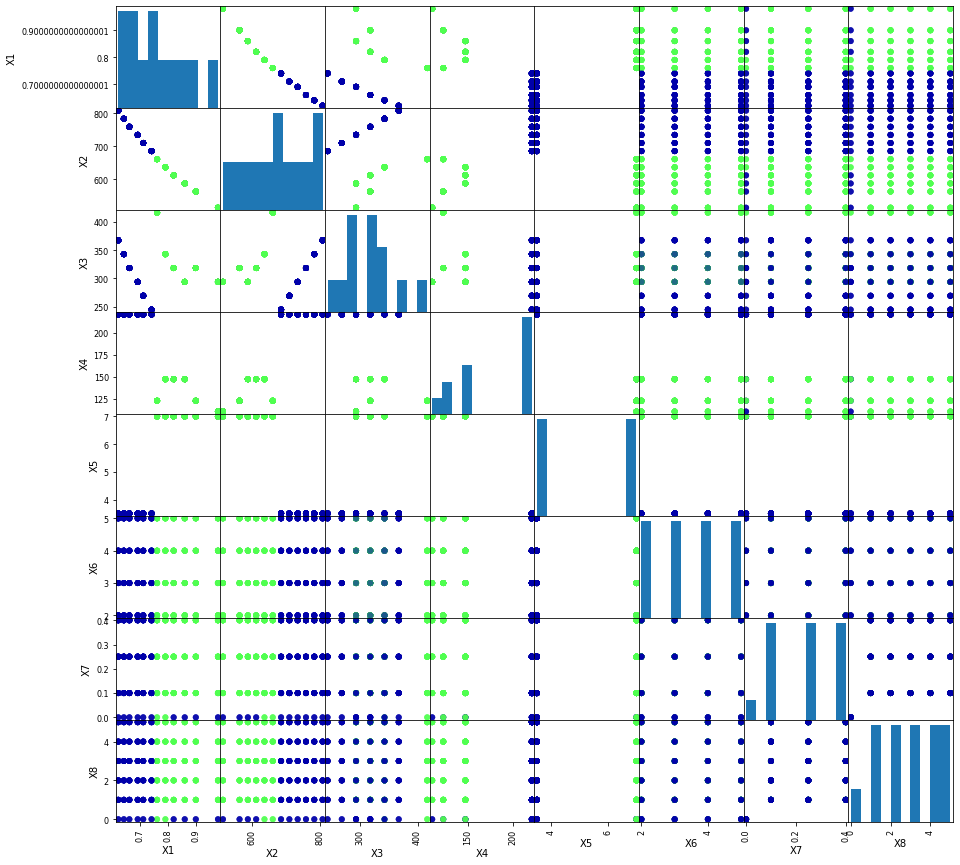

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',
                          cmap=mglearn.cm3)


In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [6]:
df2['class'].value_counts() #샘플링 후의 0,1 카운트

1    368
0    368
Name: class, dtype: int64

In [7]:
#샘플링 데이터셋에서 독립변수,종속변수 구분
X=X_samp[train_cols]
y=y_samp['class']

In [8]:
#학습용:검증용 8:2구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                stratify=y,random_state=0)

In [9]:
n1=0
n2=0
for i in y_test.values:
    if i ==0:
        n1+=1
    else:
        n2+=1
print(n1,n2)

74 74


In [10]:
#인공신경망 모형
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(random_state=100,max_iter=500)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [11]:
#예측정확도
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9846938775510204
0.972972972972973


In [12]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=['0','1'],columns=['0','1'])
df_cm


,0,1
0,70,4
1,0,74


In [13]:
import pandas as pd
df=pd.read_csv('d:/data/energy/ENB2012_2data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,class,class2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,0,1


In [14]:
df['class2'].value_counts()

0    393
1    375
Name: class2, dtype: int64

In [15]:
train_cols=df.columns[0:8]
X=df[train_cols] # 독립변수
y=df['class2'] #종속변수

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8D554F348>,
      dtype=object)

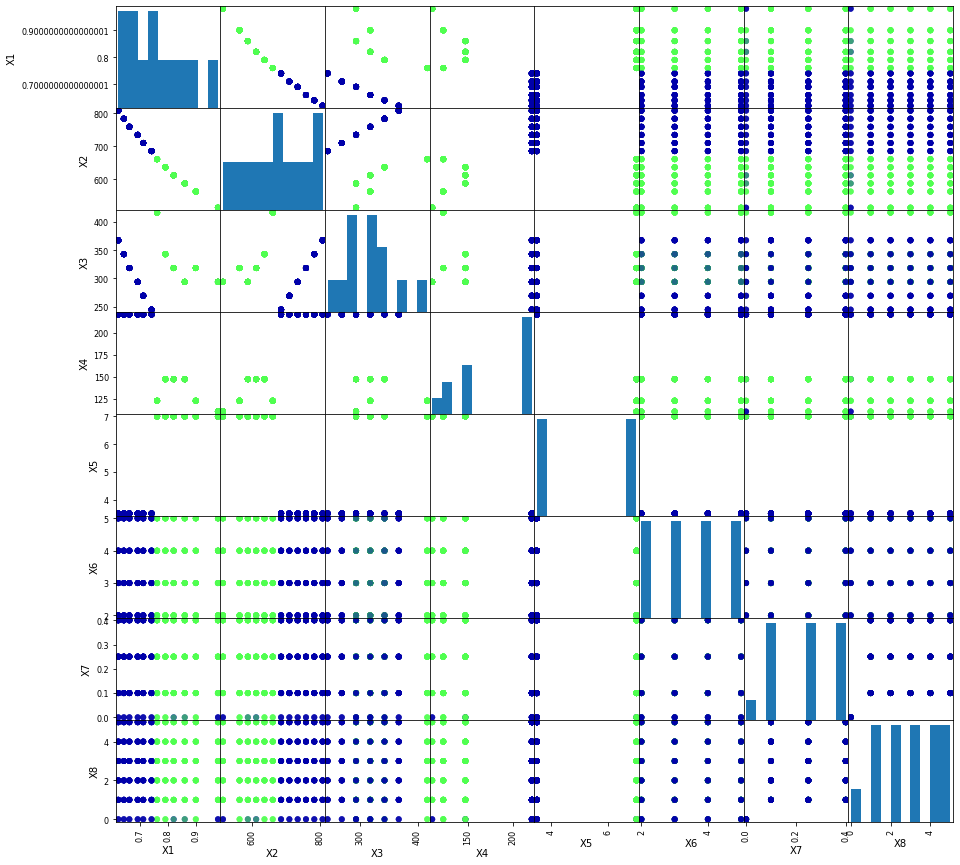

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',
                          cmap=mglearn.cm3)


In [17]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class2'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [18]:
df2['class2'].value_counts() #샘플링 후의 0,1 카운트

1    375
0    375
Name: class2, dtype: int64

In [19]:
#샘플링 데이터셋에서 독립변수,종속변수 구분
X=X_samp[train_cols]
y=y_samp['class2']

In [20]:
#학습용:검증용 8:2구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                stratify=y,random_state=0)

In [21]:
#인공신경망 모형
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(random_state=100,max_iter=500)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [22]:
#예측정확도
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9883333333333333
0.9866666666666667


In [23]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=['0','1'],columns=['0','1'])
df_cm

,0,1
0,73,2
1,0,75
